<a href="https://colab.research.google.com/github/dercodeKoenig/image-upscaling.net_API/blob/main/image_upscaling_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# remove default files and download test image for upscaling and background removal
!rm -r *
!wget https://image-upscaling.net/assets/images/test_image.jpg

--2026-01-14 13:48:35--  https://image-upscaling.net/assets/images/test_image.jpg
Resolving image-upscaling.net (image-upscaling.net)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to image-upscaling.net (image-upscaling.net)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /static/assets/images/test_image.jpg [following]
--2026-01-14 13:48:35--  https://image-upscaling.net/static/assets/images/test_image.jpg
Reusing existing connection to image-upscaling.net:443.
HTTP request sent, awaiting response... 200 OK
Length: 28794 (28K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  28.12K  --.-KB/s    in 0.002s  

2026-01-14 13:48:35 (12.9 MB/s) - ‘test_image.jpg’ saved [28794/28794]



# setting server url and client id for future requests

In [33]:
import requests
import json

serverurl = "https://image-upscaling.net"
client_id = "af25d8e9971a747bf55c17195f39757b"

# Cookie with a valid 32-digit client_id will always be sent with the request
cookies = {
    "client_id": client_id
}

# upscaling api

In [34]:
# upload an image

use_face_enhance = False
scale = 4
path = "test_image.jpg"
model = "general"

url = "/".join([serverurl, "upscaling_upload"])
data = {"scale": scale, "model": model}
if use_face_enhance: # optional param for plus and general models
    data["fx"] = ""
data["prompt"] = "" # optional param for diffuser
data["creativity"] = 0.1 # optional param for diffuser

files = {"image": open(path, "rb")}
original_filename = requests.post(url, data=data, files=files, cookies=cookies).text
print(original_filename)

test_image_2026-01-14_13:39:48.471578.jpg


In [35]:
# get processing status

url = "/".join([serverurl, "upscaling_get_status_v2"]) # or "upscaling_get_status" (old one)
response = requests.get(url, cookies=cookies)
print(response.json())

[{'completed': True, 'filename': 'test_image_2026-01-14_13:39:48.471578.jpg.png', 'image_url': 'https://image-upscaling.net/download_upscaling_data/test_image_2026-01-14_13:39:48.471578.jpg.png', 'original_filename': 'test_image_2026-01-14_13:39:48.471578.jpg'}]


In [36]:
# download results

while True:
  url = "/".join([serverurl, "upscaling_get_status_v2"])
  files = requests.get(url, cookies=cookies).json()

  # download all processed images
  for entry in files:
    filename = entry["filename"]
    completed = entry["completed"]
    url = entry["image_url"]
    if completed:
      original_filename = entry["original_filename"] # this is the filename returned by the upload method, use this to identify your file


      params = {}
      #params["preview"] = "" # will return a small preview
      params["delete_after_download"] = "" # this will delete the file from the server after it was downloaded
      #params["delete_without_download"] = "" # this will delete the file from server but skip returning the file content. Can be used after you already downloaded the file.

      print("downloading", filename)
      response = requests.get(url, cookies=cookies, params = params)
      with open(filename, "wb") as f:
        f.write(response.content)

  if(len(files) == 0):
    break # everything is downloaded
  else:
    import time
    time.sleep(1)

downloading test_image_2026-01-14_13:39:48.471578.jpg.png


# remove-background api

In [37]:
# upload an image to be processed

path = "test_image.jpg"
url = "/".join([serverurl, "removebg_upload"])
files = {
        "image": open(path, "rb")
}
original_filename = requests.post(url, files=files, cookies=cookies).text
print(original_filename)

test_image_2026-01-14_13:41:41.604622.jpg


In [38]:
## getting information about the images on the server

url = "/".join([serverurl, "removebg_get_status"])
response = requests.get(url, cookies=cookies)
print(response.json())

{'pending': [], 'processed': ['https://image-upscaling.net/download_removebg_data/test_image_2026-01-14_13:41:41.604622.jpg.png'], 'processing': []}


In [39]:
## downloading the processed file(s)

while True:
  url = "/".join([serverurl, "removebg_get_status_v2"])
  files = requests.get(url, cookies=cookies).json()

  # download all processed images
  for entry in files:
    filename = entry["filename"]
    completed = entry["completed"]
    url = entry["image_url"]
    if completed:
      original_filename = entry["original_filename"] # this is the filename returned by the upload method, use this to identify your file


      params = {}
      params["delete_after_download"] = "" # this will delete the file from the server after it was downloaded
      #params["delete_without_download"] = "" # this will delete the file from server but skip returning the file content. Can be used after you already downloaded the file.

      print("downloading", filename)
      response = requests.get(url, cookies=cookies, params = params)
      with open(filename, "wb") as f:
        f.write(response.content)

  if(len(files) == 0):
    break # everything is downloaded
  else:
    import time
    time.sleep(1)

downloading test_image_2026-01-14_13:41:41.604622.jpg.png


# text-to-speech api

In [76]:
## submit text to be processed

url = "/".join([serverurl, "tts_submit"])

data = {}
data["text"] = "This is the text to speech api"
data["voice"] = "am_michael"
data["speed"] = 1.1

response = requests.post(url, json=data, cookies=cookies)
print(response.text)

1768398668090


In [77]:
## getting information on requests

url = "/".join([serverurl, "tts_get_data"])
response = requests.get(url, cookies = cookies)
print(response.json())

[{'req_id': 1768398668090, 'result': '', 'speed': 1.1, 'status': 'pending', 'text': 'This is the text to speech api', 'voice': 'am_michael'}]


In [78]:
## downloading all results

while True:
    url = "/".join([serverurl, "tts_get_data"])
    response = requests.get(url, cookies=cookies).json()

    for element in response:
        url = element["result"]
        if url != "":
            print(url)
            params = {"delete_after_download": ""}
            content = requests.get(url, params=params, cookies=cookies).content
            filename = url.split("/")[-1] + ".mp3"
            with open(filename, "wb") as f:
                f.write(content)

    if not response:
        break
    else:
        import time
        time.sleep(1)

https://image-upscaling.net/download_tts_result/1768398668090


In [79]:
# display the mp3 file
from IPython.display import Audio
Audio(filename)

# re-Imagine api


In [44]:
## uploading an image to be processed

path = "test_image.jpg"
url = "/".join([serverurl, "reImagine_upload"])
files = {"image": open(path, "rb")}
data = {
    "style": "Ghibli"  # select the desired style
}
req_id = requests.post(url, files=files, cookies=cookies, data=data).text
print(req_id)

test_image_2026-01-14_13:42:26.482888.png


In [48]:
## get the status for the current request

url = "/".join([serverurl, "reImagine_get_status"])
entries = requests.get(url, cookies=cookies).json()
for entry in entries:
  if entry['req_id'] == req_id:
    print(entry)

{'input_image': 'https://image-upscaling.net/reImagine_download_data/test_image_2026-01-14_13:42:26.482888.png?get_input_image=True', 'is_completed': False, 'req_id': 'test_image_2026-01-14_13:42:26.482888.png', 'result': ''}


In [49]:
## wait and download the result image

import time

def wait_and_download(request_id, filename):
    while True:
        url = "/".join([serverurl, "reImagine_get_status"])
        entries = requests.get(url, cookies=cookies).json()

        for entry in entries:
            if entry['req_id'] == request_id:
                if entry['is_completed'] == True:
                    print("the image is processed")
                    url = entry['result']
                    response = requests.get(url, cookies=cookies, params={"delete_after_download":""})
                    with open(filename, "wb") as f:
                        f.write(response.content)
                    return
        time.sleep(1)

# Usage example
filename = req_id
wait_and_download(req_id, filename)

the image is processed


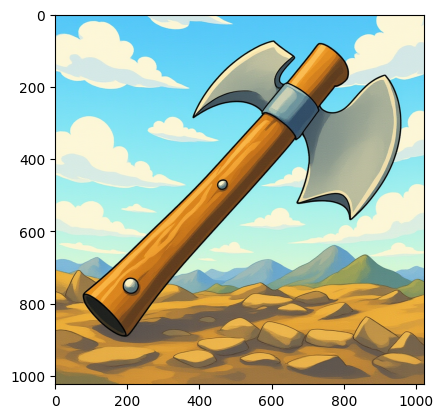

In [50]:
# show the image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

# get account info

In [51]:
url = "/".join([serverurl, "get_account_info"])
response = requests.get(url, cookies=cookies).json()
print(response)

{'balance': 0, 'client_id': 'af25d8e9971a747bf55c17195f39757b', 'email': '', 'has_free_quota_left': True, 'ip': '34.32.140.30', 'quota_free': 0.2, 'quota_used': 0.1006}
